In [1]:
import numpy as np
import matplotlib.pylab as plt
from rubin_scheduler.utils import ddf_locations

%matplotlib inline
from rubin_scheduler.utils import SURVEY_START_MJD

from astropy.time import Time

In [2]:
# from https://github.com/astropy/astroplan/blob/main/astroplan/moon.py
# Licensed under a 3-clause BSD style license - see LICENSE.rst
"""
This version of the `moon` module calculates lunar phase angle for a geocentric
"""

# Third-party
import numpy as np
from astropy.coordinates import get_sun, get_body

__all__ = ["moon_phase_angle", "moon_illumination"]


def moon_phase_angle(time, ephemeris=None):
    """
    Calculate lunar orbital phase in radians.

    Parameters
    ----------
    time : `~astropy.time.Time`
        Time of observation

    ephemeris : str, optional
        Ephemeris to use.  If not given, use the one set with
        `~astropy.coordinates.solar_system_ephemeris` (which is
        set to 'builtin' by default).

    Returns
    -------
    i : `~astropy.units.Quantity`
        Phase angle of the moon [radians]
    """
    # TODO: cache these sun/moon SkyCoord objects

    sun = get_sun(time)
    moon = get_body("moon", time, ephemeris=ephemeris)
    elongation = sun.separation(moon)
    return np.arctan2(sun.distance*np.sin(elongation),
                      moon.distance - sun.distance*np.cos(elongation))


def moon_illumination(time, ephemeris=None):
    """
    Calculate fraction of the moon illuminated.

    Parameters
    ----------
    time : `~astropy.time.Time`
        Time of observation

    ephemeris : str, optional
        Ephemeris to use.  If not given, use the one set with
        `~astropy.coordinates.solar_system_ephemeris` (which is
        set to 'builtin' by default).

    Returns
    -------
    k : float
        Fraction of moon illuminated
    """
    i = moon_phase_angle(time, ephemeris=ephemeris)
    k = (1 + np.cos(i))/2.0
    return k.value

In [3]:
ddfs = ddf_locations()

ddf_data = np.load('/Users/yoachim/rubin_sim_data/scheduler/ddf_grid.npz')
ddf_grid = ddf_data['ddf_grid'].copy()

ddf_name = 'EDFS_a'

In [4]:
euclid_times = [["2025-08-16", "2025-09-01"], ["2025-12-30", "2026-01-19"], 
               ["2026-08-19", "2026-09-05"], ["2026-12-25", "2027-01-20"],
               ["2027-08-17", "2027-09-04"], ["2027-12-28", "2028-01-18"],
               ["2028-08-18", "2028-09-02"], ["2028-12-26", "2029-01-17"],
               ["2029-08-23", "2029-09-02"]]

times = []
for block in euclid_times:
    t = Time(block)
    times.append(t.mjd)

/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 2 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


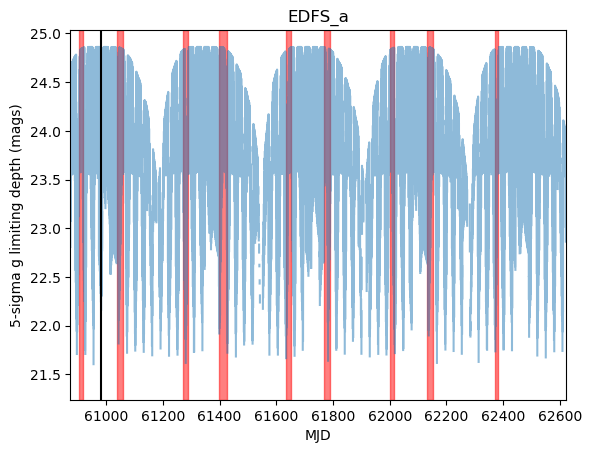

In [5]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'], alpha=0.5)
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')

plt.xlim([np.min(times)-30, SURVEY_START_MJD+365*4.5])
for t in times:
    ax.axvspan(t[0], t[1], alpha=0.5, color="red")

ax.axvline(SURVEY_START_MJD, color='k')

In [6]:
SURVEY_START_MJD

60980.0

In [7]:
full_dates = [
   "2025-08-16",
    "2025-08-17",
    "2025-08-18",
    "2025-08-19",
    "2025-08-20",
    "2025-08-21",
    "2025-08-27",
    "2025-08-28",
    "2025-08-29",
    "2025-08-30",
    "2025-09-01",
    
    "2025-12-30",
    "2025-12-31",
    "2026-01-01",
    "2026-01-02",
    "2026-01-03",
    "2026-01-04",
    "2026-01-05",
    
    "2026-01-17",
    "2026-01-18",
    "2026-01-19",

    "2026-08-19",
    "2026-08-20",
    "2026-08-21",
    "2026-08-22",
    "2026-08-23",
    "2026-08-24",

    "2026-08-30",
    "2026-08-31",
    "2026-09-01",
    "2026-09-02",
    "2026-09-03",
    "2026-09-04",
    "2026-09-05",

    "2026-12-25",
    "2026-12-26",
    "2026-12-27",
    "2026-12-28",
    "2026-12-29",
    "2026-12-30",
    "2026-12-31",

    "2027-01-15",
    "2027-01-16",
    "2027-01-17",
    "2027-01-18",
    "2027-01-19",
    "2027-01-20",

    "2027-08-17",
    "2027-08-18",
    "2027-08-19",
    "2027-08-20",
    "2027-08-21",
    "2027-08-22",
    "2027-08-30",
    "2027-08-31",
    "2027-09-01",
    "2027-09-02",
    "2027-09-03",
    "2027-09-04",
    "2027-09-05",
    
    "2027-12-28",
    "2027-12-29",
    "2027-12-30",
    "2027-12-31",
    "2028-01-01",
    "2028-01-02",
    "2028-01-13",
    "2028-01-14",
    "2028-01-15",
    "2028-01-16",
    "2028-01-17",
    "2028-01-18",

    "2028-08-18",
    "2028-08-19",
    "2028-08-20",
    "2028-08-21",
    "2028-08-22",
    "2028-08-23",

    "2028-08-30",
    "2028-08-31",
    "2028-09-01",
    "2028-09-02",

    "2028-12-26",
    "2028-12-27",
    "2028-12-28",
    "2028-12-29",
    "2028-12-30",
    "2028-12-31",
    "2029-01-12",
    "2029-01-13",
    "2029-01-14",
    "2029-01-15",
    "2029-01-16",
    "2029-01-17",
    
    "2029-08-23",
    "2029-08-24",
    "2029-08-25",
    "2029-08-26",
    "2029-08-27",
    "2029-08-28",
    "2029-08-29",
    "2029-08-30",
    "2029-08-31",
    "2029-09-01",
    "2029-09-02",
    
]

In [8]:
full_times = Time(full_dates)

/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 18 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [9]:
illums = moon_illumination(full_times)

/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 18 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 18 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 17 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 17 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Text(0.5, 1.0, 'EDFS')

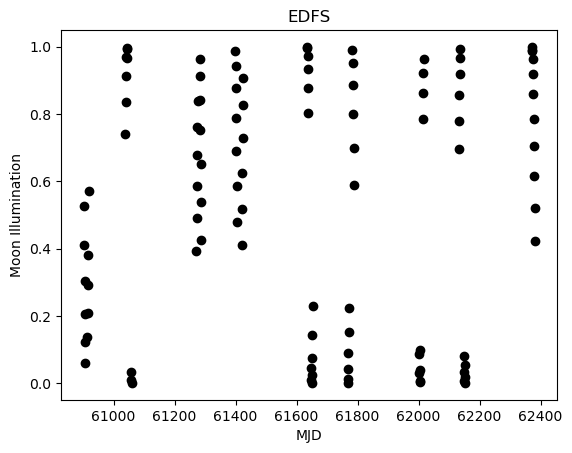

In [10]:
fig, ax = plt.subplots()
ax.plot(full_times.mjd, illums, 'ko')
ax.set_xlabel("MJD")
ax.set_ylabel("Moon Illumination")
ax.set_title("EDFS")